In [1]:
from sklearn import metrics
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
path  = 'data.txt'
skin = open(path,'r')
rl = skin.readlines()
#print(rl)

src_data = []
count = [0,0]
for e in rl:
    if(e.find('\n') != -1):
        e = e[:-1]
    a= e.split(' ')
    a = [float(i) for i in a]
    src_data.append(np.array(a))

skin.close()
#print(src_data)


x_points = [e[:-1] for e in src_data]
y_points = [e[-1] for e in src_data]

x_train,y_train = np.array(x_points[:216]), y_points[0:216]
x_test,y_test = np.array(x_points[216:]), y_points[216:]

In [3]:
from svm import SVM
clf = SVM(kernel="linear", C=1.0,verbose=1)
clf.fit(x_train, np.array(y_train)*2-3)
predictions = clf.predict(x_test)
probs = clf.predict_score(x_test)
#print(predictions)
print 'Accuracy: ', np.sum(predictions == np.array(y_test)*2-3 ) /(0.0001+len(predictions))
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))
sigs = [sigmoid(e) for e in probs]
svm_fpr, svm_tpr, svm_th = roc_curve(np.array(y_test)-1, sigs)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

Accuracy:  0.8518502743513438


In [4]:
##XGBOOSTING 

import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=np.array(y_train)-1)
dtest = xgb.DMatrix(x_test, label=np.array(y_test)-1)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'binary:logistic',  # error evaluation for multiclass training
}
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
#print preds
predictions = [round(value) for value in preds]

print np.sum(predictions == np.array(y_test)-1)/(0.0001+len(predictions))

xg_fpr, xg_tpr, xg_th = roc_curve(np.array(y_test)-1, preds)
xg_roc_auc = metrics.auc(xg_fpr, xg_tpr)

0.8518502743513438


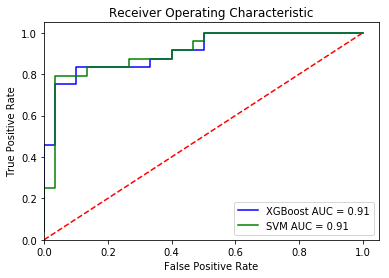

In [5]:
plt.title('Receiver Operating Characteristic')
plt.plot(xg_fpr, xg_tpr, 'b', label = 'XGBoost AUC = %0.2f' % xg_roc_auc)
plt.plot(svm_fpr, svm_tpr, 'g', label = 'SVM AUC = %0.2f' % svm_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()